In [23]:
# Machine Learning for the project
# Oran Howard 18672266
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

fifa_results_final = pd.read_csv('Final_data/fifa_results_final_elo.csv')
fifa_results_final = fifa_results_final.drop(fifa_results_final.columns[[0]], axis=1)
fifa_results_final

,ID,Game_ID,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,total_away_goals,total_home_shot,total_away_shot,game_week_home,game_week_away_x,game_week_away_y,avg_home_goals,avg_away_goals,avg_home_ST,avg_away_AT
0,1,0,E0,2014-08-16,Arsenal,Crystal Palace,2,1,H,1,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
1,2,1,E0,2014-08-16,Leicester,Everton,2,2,D,1,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
2,3,2,E0,2014-08-16,Man United,Swansea,1,2,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
3,4,3,E0,2014-08-16,QPR,Hull,0,1,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
4,5,4,E0,2014-08-16,Stoke,Aston Villa,0,1,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2276,375,E0,2020-07-26,Leicester,Man United,0,2,A,0,...,24.0,85.0,95.0,19,1,19,1.944444,1.333333,4.722222,5.277778
2276,2277,376,E0,2020-07-26,Man City,Norwich,5,0,H,2,...,7.0,125.0,54.0,19,1,19,2.888889,0.388889,6.944444,3.000000
2277,2278,377,E0,2020-07-26,Newcastle,Liverpool,1,3,A,1,...,30.0,75.0,96.0,19,1,19,1.055556,1.666667,4.166667,5.333333
2278,2279,378,E0,2020-07-26,Southampton,Sheffield United,3,1,H,0,...,14.0,73.0,42.0,19,1,19,1.000000,0.777778,4.055556,2.333333


In [24]:
# all data 
mixed_data_combination_3 = fifa_results_final[['FTHG','FTAG','HomeTeam','AwayTeam','HTR',
                                               'ATR',' HGKR','HDefR','HMidR',
                                              'HAttR','AGKR','ADefR','AMidR',
                                               'AAttR','total_home_points',
                                               'total_away_points',
                                          'HomeTeamELO','AwayTeamELO','Difference_Elo',
                                               'avg_home_goals','total_home_goals',
                                               'total_away_goals','avg_away_goals']]
# fifa data
virtual_data_combination_3 = fifa_results_final[['FTHG','FTAG','HomeTeam','AwayTeam',
                                                 'HTR','ATR','HTP','HTW','HTV','ATP',
                                                 'ATW','ATV',' HGKR','HDefR','HMidR',
                                             'HAttR','AGKR','ADefR','AMidR','AAttR']]
# real data
real_data_combination_3 = fifa_results_final[['FTHG','FTAG','HomeTeam','AwayTeam',
                                              'total_home_points','total_away_points',
                                              'HomeTeamELO','AwayTeamELO','Difference_Elo',
                                              'avg_home_goals','total_home_goals',
                                              'total_away_goals',
                                          'avg_away_goals','avg_home_ST',
                                              'avg_away_AT','Difference_Rating',
                                              'Differnce_Val','Differnce_Wage']]

mixed_data_combination_4 = fifa_results_final[['FTHG','FTAG','HomeTeam','AwayTeam','HTR',
                                               'ATR','HTP','HTW','HTV','ATP','ATW','ATV',
                                               ' HGKR','HDefR','HMidR',
                                            'avg_home_goals','avg_away_goals','avg_home_ST',
                                               'avg_away_AT','HAttR','AGKR','ADefR','AMidR',
                                               'AAttR','Differnce_Wage','HomeTeamELO',
                                               'AwayTeamELO','total_home_goals',
                                               'total_away_goals','avg_home_ST','avg_away_AT',
                                     'B365H','B365A','B365D']]


In [25]:
def split_encode(regression_data):
    
    labelencoder = LabelEncoder()

    HomeTeam = labelencoder.fit_transform(regression_data['HomeTeam'])
    AwayTeam = labelencoder.fit_transform(regression_data['AwayTeam'])
    
    regression_data['HomeTeam'] = HomeTeam
    regression_data['AwayTeam'] = AwayTeam

    df_val_regression = regression_data.values
    #assigns all the columns except the first column to the variable X
    X_regression = df_val_regression[:,2:40]
    #assigns only the first column as variable Y
    Y_regression = df_val_regression[:,0:2]

    X_train_regression, X_test_regression, Y_train_regression, Y_test_regression = train_test_split(X_regression, Y_regression, test_size=0.1665,shuffle=False,random_state=0)
    #X_train_regression, X_test_regression, Y_train_regression, Y_test_regression = train_test_split(X_regression, Y_regression, test_size=0.1665,shuffle=True,random_state=65)

    df_X_test_regression = pd.DataFrame(X_test_regression)
    
    return X_train_regression, X_test_regression, Y_train_regression, Y_test_regression,X_regression,Y_regression

real_data_combination_3 = split_encode(real_data_combination_3) 
X_train_real_data = real_data_combination_3[0]
X_test_real_data = real_data_combination_3[1]
Y_train_real_data = real_data_combination_3[2]
Y_test_real_data = real_data_combination_3[3]
X_real_data = real_data_combination_3[4]
Y_real_data = real_data_combination_3[5]


virtual_data_combination_3 = split_encode(virtual_data_combination_3) 
X_train_virtual_data = virtual_data_combination_3[0]
X_test_virtual_data = virtual_data_combination_3[1]
Y_train_virtual_data = virtual_data_combination_3[2]
Y_test_virtual_data = virtual_data_combination_3[3]
X_virtual_data = virtual_data_combination_3[4]
Y_virtual_data = virtual_data_combination_3[5]


mixed_data_combination_3 = split_encode(mixed_data_combination_3) 
X_train_mixed_data_3 = mixed_data_combination_3[0]
X_test_mixed_data_3 = mixed_data_combination_3[1]
Y_train_mixed_data_3 = mixed_data_combination_3[2]
Y_test_mixed_data_3 = mixed_data_combination_3[3]
X_mixed_data_3 = mixed_data_combination_3[4]
Y_mixed_data_3 = mixed_data_combination_3[5]

mixed_data_combination_4 = split_encode(mixed_data_combination_4) 
X_train_mixed_data_4 = mixed_data_combination_4[0]
X_test_mixed_data_4 = mixed_data_combination_4[1]
Y_train_mixed_data_4 = mixed_data_combination_4[2]
Y_test_mixed_data_4 = mixed_data_combination_4[3]
X_mixed_data_4 = mixed_data_combination_4[4]
Y_mixed_data_4 = mixed_data_combination_4[5]

<ipython-input-25-6f6a8918673e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data['HomeTeam'] = HomeTeam
<ipython-input-25-6f6a8918673e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data['AwayTeam'] = AwayTeam


In [26]:
df_Y_train_regression = pd.DataFrame(Y_train_mixed_data_3)
#X_classification = pd.DataFrame(X_classification)
df_X_test_regression = pd.DataFrame(X_test_mixed_data_3)
df_Y_test_regression = pd.DataFrame(Y_test_mixed_data_3)
# change team names to numeric values so we can encode and output them later
home_team_train = df_X_test_regression[0]
home_team_num_list_regression = home_team_train.tolist()
away_team_train = df_X_test_regression[1]
away_team_num_list_regression = away_team_train.tolist() 
home_team_num_list_regression

home_team_num_list_regression = list(map(int, home_team_num_list_regression))
away_team_num_list_regression = list(map(int, away_team_num_list_regression))


In [27]:
def encode_teams(fifa_results_final,home_team_num_list,away_team_num_list):

    label_encoder = LabelEncoder()
    input_classes = fifa_results_final['HomeTeam'].unique()
    label_encoder.fit(input_classes)

    labels_home = fifa_results_final['HomeTeam'].unique()
    encoded_labels = label_encoder.transform(labels_home)
    home_team_name = label_encoder.inverse_transform(home_team_num_list)

    input_classes_away = fifa_results_final['AwayTeam'].unique()
    label_encoder.fit(input_classes_away)

    labels_away = fifa_results_final['AwayTeam'].unique()
    encoded_labels_away = label_encoder.transform(labels_away)
    away_team_name = label_encoder.inverse_transform(away_team_num_list)
    target_names = ['Away Win', 'Draw', 'Home Win']
        
    return home_team_name,away_team_name

class_encoded = encode_teams(fifa_results_final,home_team_num_list_regression,away_team_num_list_regression)   
home_team_name = class_encoded[0]
away_team_name = class_encoded[1]

In [9]:
def get_results(goals):
# get actual results for the test data, so we can compare 
    actual_result = []

    for i in range(len(goals)):
        if goals[i][0] > goals[i][1]:
            actual_result.append('H')
        elif goals[i][1] > goals[i][0]:
            actual_result.append('A')
        else:
            actual_result.append('D')
            
    return actual_result
    

In [10]:
def correct_predictions(pred_goals, Y_test_regression):
    result = []

    column_names = ["Predicted Result", "Actual Result"]
    prediction_data = pd.DataFrame(columns = column_names)
    result = get_results(pred_goals)
    prediction_data['Predicted Result'] = result
    # call the actual result function
    actual_result = get_results(Y_test_regression)
    prediction_data['Actual Result'] = actual_result

    correct_pred = []
    # see if the bookies prediction is the same as the actual result
    for i in range(len(prediction_data)):
        if prediction_data['Predicted Result'][i]  == prediction_data['Actual Result'][i]:
            correct_pred.append("correct")
    # find the percentage of correct predictions
    
    correct = len(correct_pred)/len(prediction_data)*100  
    
    return correct, prediction_data



In [65]:
# a graph to plot actual goals vs predicted goals 
def plot_regression(Y_test_regression,Y_predictions):
    
    fig = plt.figure(figsize=(10,5))
    plt.plot(Y_test_regression[:,0], color = 'red', label = 'Real home data')
    plt.plot(Y_predictions[:,0], color = 'blue', label = 'Predicted home data')
    plt.plot(Y_test_regression[:,1], color = 'green', label = 'Real away data')
    plt.plot(Y_predictions[:,1], color = 'yellow', label = 'Predicted away data')

    plt.title('Prediction')
    plt.xlabel('Game ID')
    plt.ylabel('Number of goals')
    plt.legend()
    plt.show()

Linear Regression using real data:

MAE: 0.8896799794217765

MSE: 1.2708204432386214

RMSE: 1.2708204432386214

Correct Predictions:  52.10526315789473


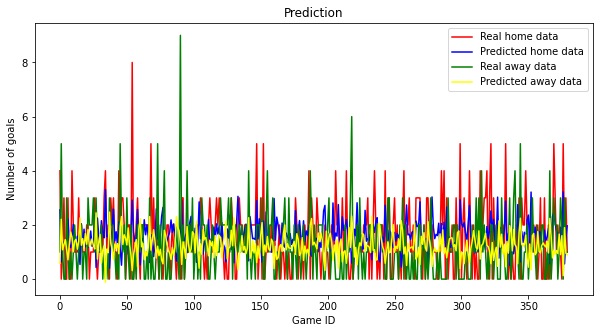



Linear Regression using virtual data:

MAE: 0.8994472481867744

MSE: 1.314243689169414

RMSE: 1.314243689169414

Correct Predictions:  49.473684210526315


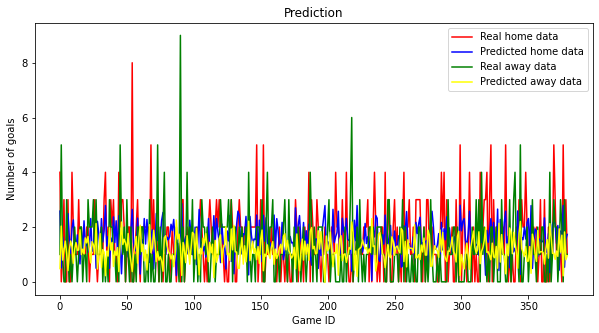



Linear Regression using mixed data_3:

MAE: 0.8924253508817914

MSE: 1.2913002267402396

RMSE: 1.2913002267402396

Correct Predictions:  52.63157894736842


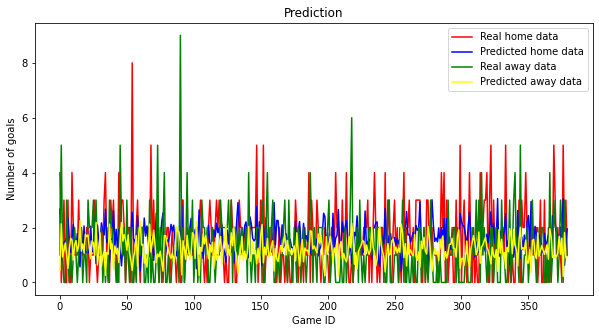



Linear Regression using mixed data_4:

MAE: 0.8732687227847769

MSE: 1.2580204836126976

RMSE: 1.2580204836126976

Correct Predictions:  50.26315789473684


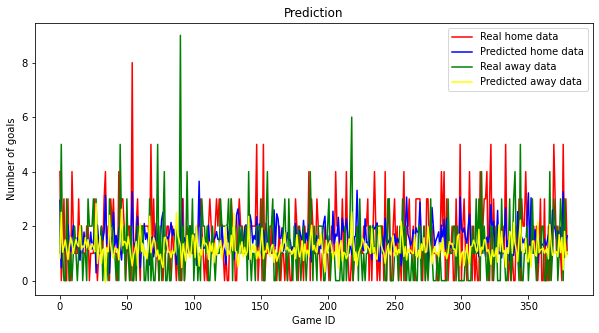

In [66]:
from sklearn import linear_model
import sklearn.metrics as sm
# Linear Regression

def linear_regression(X_train, X_test, Y_train, Y_test):
    
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)
    pred_goals_lin = regr.predict(X_test)
    #pred_goals = np.round(pred_goals)
    lin_mae = metrics.mean_absolute_error(Y_test,pred_goals_lin)
    print('\nMAE:',lin_mae)
    print('\nMSE:',metrics.mean_squared_error(Y_test,pred_goals_lin))
    print('\nRMSE:',mean_squared_error(Y_test, pred_goals_lin, squared=True))
    pred_correct = correct_predictions(pred_goals_lin,Y_test)
    print('\nCorrect Predictions: ',pred_correct[0])
    plot_regression(Y_test,pred_goals_lin)
    
print('Linear Regression using real data:')
lin_real_data = linear_regression(X_train_real_data, X_test_real_data, Y_train_real_data, Y_test_real_data)  
print('\n\nLinear Regression using virtual data:')
lin_virtual_data = linear_regression(X_train_virtual_data, X_test_virtual_data, Y_train_virtual_data, Y_test_virtual_data) 
print('\n\nLinear Regression using mixed data_3:')
lin_mixed_data_3 = linear_regression(X_train_mixed_data_3, X_test_mixed_data_3, Y_train_mixed_data_3, Y_test_mixed_data_3)    
print('\n\nLinear Regression using mixed data_4:')
lin_mixed_data_4 = linear_regression(X_train_mixed_data_4, X_test_mixed_data_4, Y_train_mixed_data_4, Y_test_mixed_data_4)    


DecisionTree Regression using real data:

MAE: 1.1789473684210527

MSE: 2.6

RMSE: 1.6115508555983917

Correct Predictions:  44.473684210526315


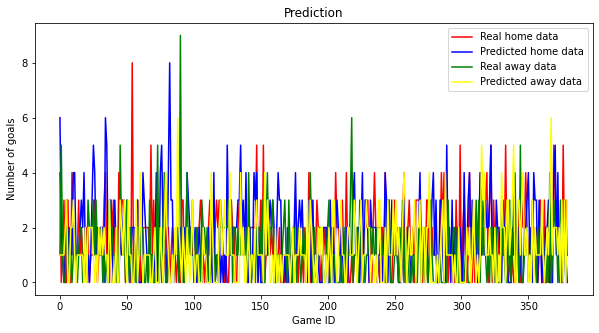


DecisionTree Regression using virtual data:

MAE: 1.2697368421052633

MSE: 2.8118421052631577

RMSE: 1.6723277273159933

Correct Predictions:  40.0


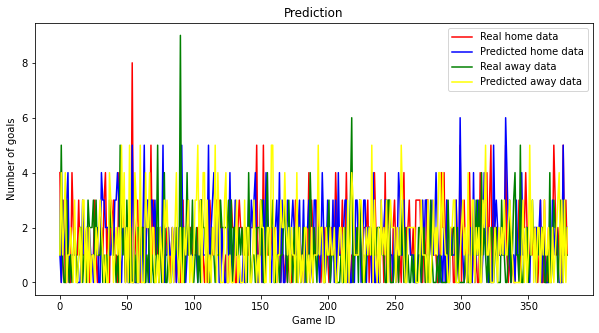


DecisionTree Regression using mixed data_3:

MAE: 1.263157894736842

MSE: 3.0552631578947365

RMSE: 1.7479114938227767

Correct Predictions:  43.684210526315795


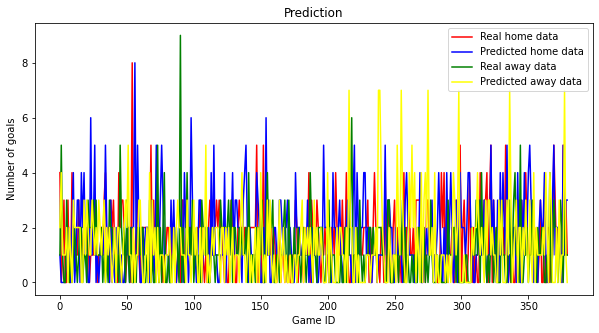



DecisionTree Regression using mixed data_4:

MAE: 1.2013157894736843

MSE: 2.6355263157894737

RMSE: 1.6196942888440704

Correct Predictions:  46.05263157894737


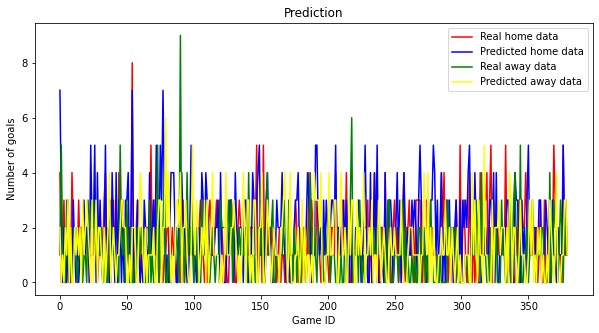

In [78]:
from sklearn.tree import DecisionTreeRegressor

def DecisionTree_regression(X_train, X_test, Y_train, Y_test):
    
    model = DecisionTreeRegressor()
    # fit model
    model.fit(X_train, Y_train)
    pred_goals_tree = model.predict(X_test)
    #pred_goals_tree = np.round(pred_goals_tree)
    dt_mae = metrics.mean_absolute_error(Y_test,pred_goals_tree)
    print('\nMAE:',dt_mae)
    print('\nMSE:',metrics.mean_squared_error(Y_test,pred_goals_tree))
    print('\nRMSE:',mean_squared_error(Y_test, pred_goals_tree, squared=False))
    pred_correct = correct_predictions(pred_goals_tree,Y_test)
    print('\nCorrect Predictions: ',pred_correct[0])
    plot_regression(Y_test,pred_goals_tree)
    
print('DecisionTree Regression using real data:')
DecisionTree_regression_real = DecisionTree_regression(X_train_real_data, X_test_real_data, Y_train_real_data, Y_test_real_data)  
print('\nDecisionTree Regression using virtual data:')
DecisionTree_regression_virtual = DecisionTree_regression(X_train_virtual_data, X_test_virtual_data, Y_train_virtual_data, Y_test_virtual_data) 
print('\nDecisionTree Regression using mixed data_3:')
DecisionTree_regression_mixed_data_3 = DecisionTree_regression(X_train_mixed_data_3, X_test_mixed_data_3, Y_train_mixed_data_3, Y_test_mixed_data_3)    
print('\n\nDecisionTree Regression using mixed data_4:')
DecisionTree_regression_mixed_data_4 = DecisionTree_regression(X_train_mixed_data_4, X_test_mixed_data_4, Y_train_mixed_data_4, Y_test_mixed_data_4)    


KNN Regression using real data:

MAE: 0.9702631578947363

MSE: 1.5003684210526331

RMSE: 1.2247929090986975

Correct Predictions:  48.1578947368421


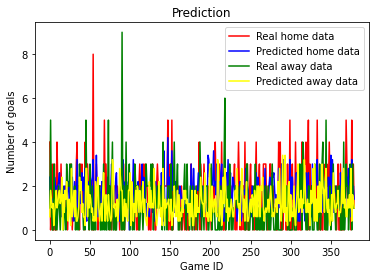


KNN Regression using virtual data:

MAE: 0.979473684210526

MSE: 1.5857894736842113

RMSE: 1.2592386708670293

Correct Predictions:  50.0


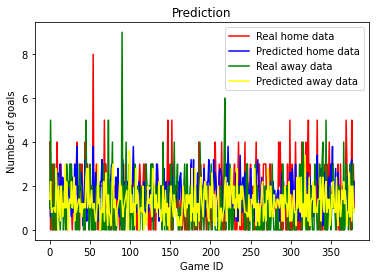


KNN Regression using mixed data_3:

MAE: 0.936052631578947

MSE: 1.4257368421052639

RMSE: 1.1939662836322555

Correct Predictions:  50.26315789473684


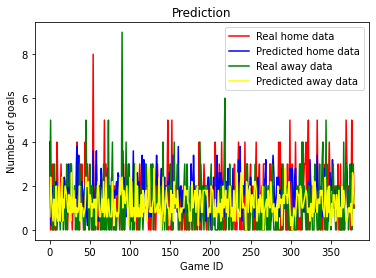


KNN Regression using mixed data_4:

MAE: 0.979473684210526

MSE: 1.5857894736842113

RMSE: 1.2592386708670293

Correct Predictions:  50.0


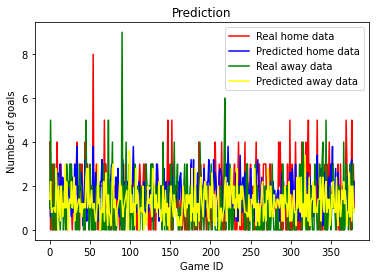

In [60]:
from sklearn.neighbors import KNeighborsRegressor

def knn_regression(X_train, X_test, Y_train, Y_test):

    model = KNeighborsRegressor()
    # fit model
    model.fit(X_train, Y_train)
    pred_goals_knn = model.predict(X_test)
    knn_mae = metrics.mean_absolute_error(Y_test,pred_goals_knn)
    print('\nMAE:',knn_mae)
    print('\nMSE:',metrics.mean_squared_error(Y_test,pred_goals_knn))
    print('\nRMSE:',mean_squared_error(Y_test, pred_goals_knn, squared=False))
    pred_correct = correct_predictions(pred_goals_knn,Y_test)
    print('\nCorrect Predictions: ',pred_correct[0])
    plot_regression(Y_test,pred_goals_knn)
    
print('KNN Regression using real data:')
knn_regression_real = knn_regression(X_train_real_data, X_test_real_data, Y_train_real_data, Y_test_real_data)  
print('\nKNN Regression using virtual data:')
knn_regression_virtual = knn_regression(X_train_virtual_data, X_test_virtual_data, Y_train_virtual_data, Y_test_virtual_data) 
print('\nKNN Regression using mixed data_3:')
knn_regression_mixed_data_3 = knn_regression(X_train_mixed_data_3, X_test_mixed_data_3, Y_train_mixed_data_3, Y_test_mixed_data_3)    
print('\nKNN Regression using mixed data_4:')
knn_regression_mixed_data_4 = knn_regression(X_train_mixed_data_4, X_test_mixed_data_4, Y_train_mixed_data_4, Y_test_mixed_data_4)    


ANN Regression using real data:

MAE: 0.920569275509125

MSE: 1.3918820013633977

RMSE: 1.1795562722815114

Correct Predictions:  50.0


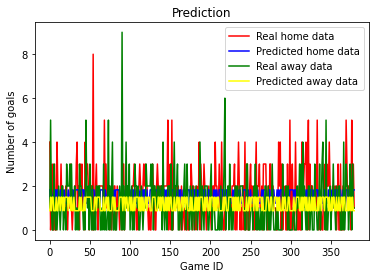


ANN Regression using virtual data:

MAE: 0.8879987320639149

MSE: 1.3387811509933945

RMSE: 1.1569677794413713

Correct Predictions:  51.05263157894737


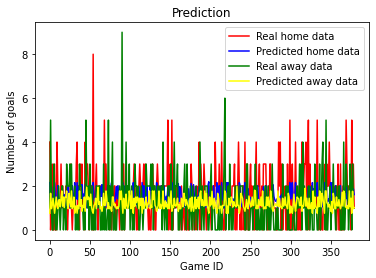


ANN Regression using mixed data_3:

MAE: 0.8851377253561286

MSE: 1.301617834454147

RMSE: 1.140866749695006

Correct Predictions:  51.578947368421055


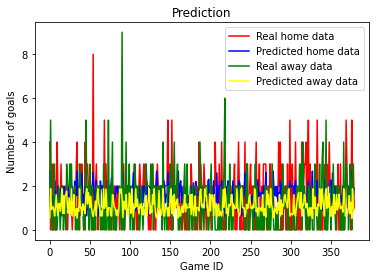


ANN Regression using mixed data_4:

MAE: 0.888601509325198

MSE: 1.3325534490198923

RMSE: 1.1542896469238864

Correct Predictions:  52.368421052631575


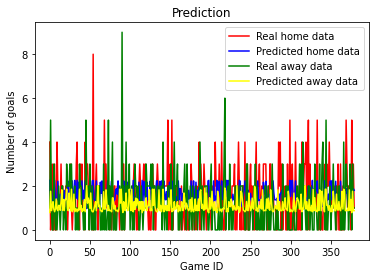

In [57]:
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor

def ann_regression(X_train, X_test, Y_train, Y_test):

    mlp = MLPRegressor(hidden_layer_sizes=(100,100), activation = 'logistic', max_iter=200)
    mor_ = MultiOutputRegressor(mlp)
    mor_ = mor_.fit(X_train, Y_train)
    pred_goals_mlp = mor_.predict(X_test)
    mlp_mae = metrics.mean_absolute_error(Y_test,pred_goals_mlp)
    print('\nMAE:',mlp_mae)
    print('\nMSE:',metrics.mean_squared_error(Y_test,pred_goals_mlp))
    print('\nRMSE:',mean_squared_error(Y_test, pred_goals_mlp, squared=False))
    pred_correct = correct_predictions(pred_goals_mlp,Y_test)
    print('\nCorrect Predictions: ',pred_correct[0])
    plot_regression(Y_test,pred_goals_mlp)
    
print('ANN Regression using real data:')
ann_regression_real = ann_regression(X_train_real_data, X_test_real_data, Y_train_real_data, Y_test_real_data)  
print('\nANN Regression using virtual data:')
ann_regression_virtual = ann_regression(X_train_virtual_data, X_test_virtual_data, Y_train_virtual_data, Y_test_virtual_data) 
print('\nANN Regression using mixed data_3:')
ann_regression_mixed_data_3 = ann_regression(X_train_mixed_data_3, X_test_mixed_data_3, Y_train_mixed_data_3, Y_test_mixed_data_3)    
print('\nANN Regression using mixed data_4:')
ann_regression_mixed_data_4 = ann_regression(X_train_mixed_data_4, X_test_mixed_data_4, Y_train_mixed_data_4, Y_test_mixed_data_4)    


SVR Poly Regression using real data:

MAE: 0.9314225455932941

MSE: 1.5357065123478884

RMSE: 1.2385011515034252

Correct Predictions:  51.31578947368421


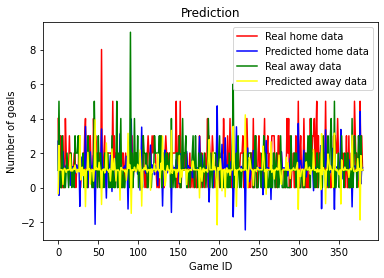


SVR Poly Regression using virtual data:

MAE: 0.8951088315798852

MSE: 1.426313981998704

RMSE: 1.1942836866440214

Correct Predictions:  50.526315789473685


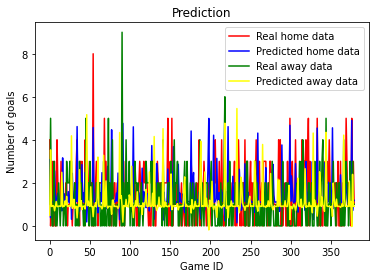


SVR Poly Regression using mixed data_3:

MAE: 0.8719286216160491

MSE: 1.2859729619548532

RMSE: 1.1340074707139722

Correct Predictions:  52.89473684210526


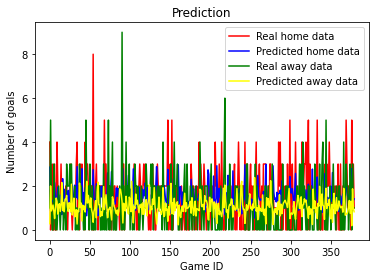


SVR Poly Regression using mixed data_4:

MAE: 0.8950769063287785

MSE: 1.4262251012550378

RMSE: 1.1942465020368278

Correct Predictions:  50.526315789473685


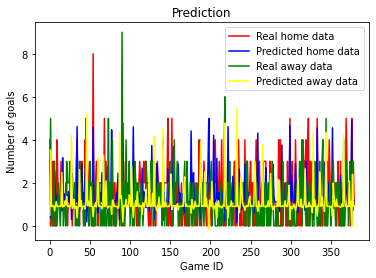

In [200]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

def svr_pol_regression(X_train, X_test, Y_train, Y_test):

    svr_pol = SVR(kernel='poly')
    mor_ = MultiOutputRegressor(svr_pol)
    mor_ = mor_.fit(X_train, Y_train)
    # Generate predictions for testing data
    pred_goals_svr_pol = mor_.predict(X_test)
    svr_pol_mae = metrics.mean_absolute_error(Y_test,pred_goals_svr_pol)
    print('\nMAE:',svr_pol_mae)
    print('\nMSE:',metrics.mean_squared_error(Y_test,pred_goals_svr_pol))
    print('\nRMSE:',mean_squared_error(Y_test, pred_goals_svr_pol, squared=False))
    pred_correct = correct_predictions(pred_goals_svr_pol,Y_test)
    print('\nCorrect Predictions: ',pred_correct[0])
    plot_regression(Y_test,pred_goals_svr_pol)
    
print('SVR Poly Regression using real data:')
svr_pol_real_data = svr_pol_regression(X_train_real_data, X_test_real_data, Y_train_real_data, Y_test_real_data)  
print('\nSVR Poly Regression using virtual data:')
svr_pol_virtual_data = svr_pol_regression(X_train_virtual_data, X_test_virtual_data, Y_train_virtual_data, Y_test_virtual_data) 
print('\nSVR Poly Regression using mixed data_3:')
svr_pol_mixed_data_3 = svr_pol_regression(X_train_mixed_data_3, X_test_mixed_data_3, Y_train_mixed_data_3, Y_test_mixed_data_3)    
print('\nSVR Poly Regression using mixed data_4:')
svr_pol_mixed_data_4 = svr_pol_regression(X_train_mixed_data_4, X_test_mixed_data_4, Y_train_mixed_data_4, Y_test_mixed_data_4)    


SVR RBF Regression using real data:

MAE: 0.8727550752919158

MSE: 1.3463165296178599

RMSE: 1.160244005662025

Correct Predictions:  49.73684210526316


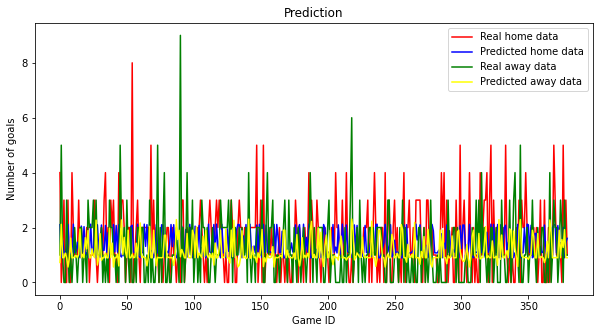

1.241401513867307

SVR RBF Regression using virtual data:

MAE: 0.8650668549678686

MSE: 1.331003830043348

RMSE: 1.1535924528731343

Correct Predictions:  51.84210526315789


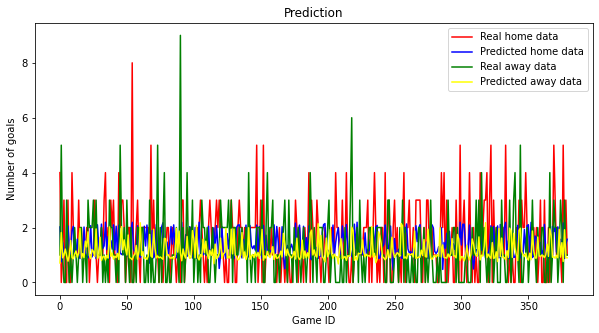

1.2496022022749036

SVR RBF Regression using mixed data_3:

MAE: 0.8717835401555608

MSE: 1.294631239062151

RMSE: 1.137818467939856

Correct Predictions:  52.63157894736842


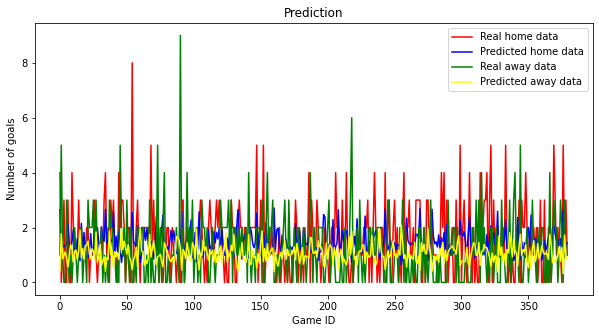

1.2481499745844868

SVR RBF Regression using mixed data_4:

MAE: 0.8653181847532869

MSE: 1.3305088474637021

RMSE: 1.1533819161726293

Correct Predictions:  51.578947368421055


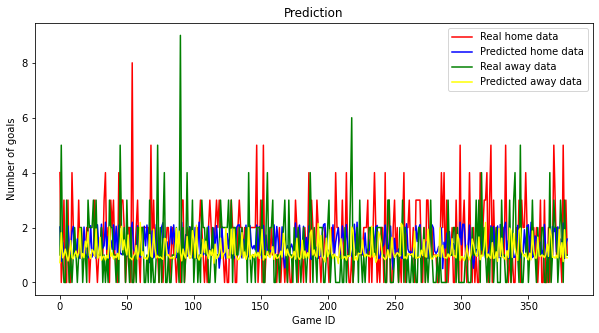

1.2510617464483955


In [70]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
def svr_rbf_regression(X_train, X_test, Y_train, Y_test):

    svr_rbf = SVR(kernel='rbf')
    mor_ = MultiOutputRegressor(svr_rbf)
    mor_ = mor_.fit(X_train, Y_train)
    # Generate predictions for testing data
    pred_goals_svr_rbf = mor_.predict(X_test)
    
    svr_rbf_mae = metrics.mean_absolute_error(Y_test,pred_goals_svr_rbf)

    print('\nMAE:', svr_rbf_mae)
    print('\nMSE:',metrics.mean_squared_error(Y_test,pred_goals_svr_rbf))
    print('\nRMSE:',mean_squared_error(Y_test, pred_goals_svr_rbf, squared=False))
    pred_correct = correct_predictions(pred_goals_svr_rbf,Y_test)
    print('\nCorrect Predictions: ',pred_correct[0])

    plot_regression(Y_test,pred_goals_svr_rbf)

print('SVR RBF Regression using real data:')
svr_pol_real_data = svr_rbf_regression(X_train_real_data, X_test_real_data, Y_train_real_data, Y_test_real_data)  
print('\nSVR RBF Regression using virtual data:')
svr_pol_virtual_data = svr_rbf_regression(X_train_virtual_data, X_test_virtual_data, Y_train_virtual_data, Y_test_virtual_data) 
print('\nSVR RBF Regression using mixed data_3:')
svr_pol_mixed_data_3 = svr_rbf_regression(X_train_mixed_data_3, X_test_mixed_data_3, Y_train_mixed_data_3, Y_test_mixed_data_3)    
print('\nSVR RBF Regression using mixed data_4:')
svr_pol_mixed_data_4 = svr_rbf_regression(X_train_mixed_data_4, X_test_mixed_data_4, Y_train_mixed_data_4, Y_test_mixed_data_4)    


RandomForest Regression using real data:

MAE: 0.9010614035087718

MSE: 1.3062850877192995

RMSE: 1.1429195182688516

Correct Predictions:  53.421052631578945


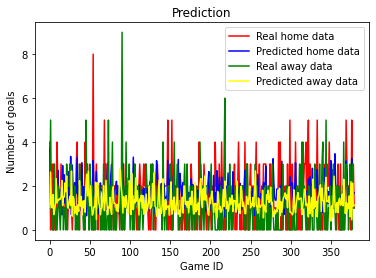


RandomForest Regression using virtual data:

MAE: 0.9117982456140352

MSE: 1.3417827485380136

RMSE: 1.1583529581184935

Correct Predictions:  48.421052631578945


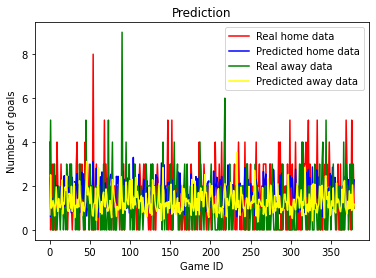


RandomForest Regression using mixed data_3:

MAE: 0.9041842105263159

MSE: 1.3049707017543852

RMSE: 1.1422897095010458

Correct Predictions:  51.84210526315789


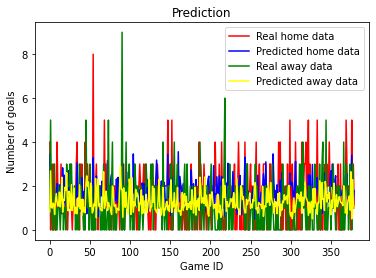


RandomForest Regression using mixed data_4:

MAE: 0.8850964912280701

MSE: 1.2696097660818715

RMSE: 1.1267694731710278

Correct Predictions:  52.89473684210526


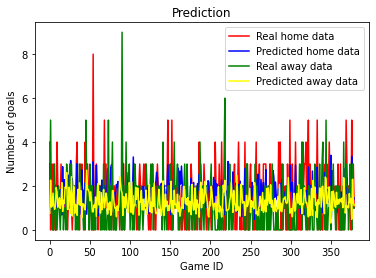

In [46]:
from sklearn.ensemble import RandomForestRegressor
def RandomForest_regression(X_train, X_test, Y_train, Y_test):
  
     # create regressor object
    RandomForest = RandomForestRegressor(n_estimators = 150, random_state = 0)
    # fit the regressor with x and y data
    RandomForest.fit(X_train, Y_train)  
    pred_goals_RandomForest = RandomForest.predict(X_test)

    RandomForest_mae = metrics.mean_absolute_error(Y_test,pred_goals_RandomForest)

    print('\nMAE:', RandomForest_mae)
    print('\nMSE:',metrics.mean_squared_error(Y_test,pred_goals_RandomForest))
    print('\nRMSE:',mean_squared_error(Y_test, pred_goals_RandomForest, squared=False))
    pred_correct = correct_predictions(pred_goals_RandomForest,Y_test)
    print('\nCorrect Predictions: ',pred_correct[0])
    plot_regression(Y_test,pred_goals_RandomForest)
    predictions_tree = pred_correct[1]
    
    return predictions_tree
    

print('RandomForest Regression using real data:')
RandomForest_real_data = RandomForest_regression(X_train_real_data, X_test_real_data, Y_train_real_data, Y_test_real_data)  
print('\nRandomForest Regression using virtual data:')
RandomForest_virtual_data = RandomForest_regression(X_train_virtual_data, X_test_virtual_data, Y_train_virtual_data, Y_test_virtual_data) 
print('\nRandomForest Regression using mixed data_3:')
RandomForest_mixed_data_3 = RandomForest_regression(X_train_mixed_data_3, X_test_mixed_data_3, Y_train_mixed_data_3, Y_test_mixed_data_3)    
print('\nRandomForest Regression using mixed data_4:')
RandomForest_mixed_data_4 = RandomForest_regression(X_train_mixed_data_4, X_test_mixed_data_4, Y_train_mixed_data_4, Y_test_mixed_data_4)    


In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
def cross_validation_randomforest(X, Y):
    
    mean_score = []
    RandomForest = RandomForestRegressor(n_estimators = 150, random_state = 0)
    scoring = 'neg_mean_absolute_error'
    mae = cross_val_score(RandomForest, X, Y, cv=5,scoring=scoring)
    mean_score.append(np.mean(mae))
    print('MAE = ', mae)
    print('Mean score: ',mean_score)

print('\nCross Validation Accuacy Scores for mixed_data_3 Random Forest:')
cross_validation_randomforest(X_mixed_data_3, Y_mixed_data_3)
print('\nCross Validation Accuacy Scores for mixed_data_4 Random Forest:')
cross_validation_randomforest(X_mixed_data_4, Y_mixed_data_4)
print('\nCross Validation Accuacy Scores for virtual_data_3 Random Forest:')
cross_validation_randomforest(X_virtual_data, Y_virtual_data)
print('\nCross Validation Accuacy Scores for real_data_3 Random Forest:')
cross_validation_randomforest(X_real_data, Y_real_data)



Cross Validation Accuacy Scores for mixed_data_1 Random Forest:
MAE =  [-0.90719298 -0.93166667 -0.96832602 -0.8986038  -0.93289474]
Mean score:  [-0.927736842105263]

Cross Validation Accuacy Scores for mixed_data_2 Random Forest:
MAE =  [-0.89038012 -0.92953216 -0.95519737 -0.90296784 -0.91371345]
Mean score:  [-0.918358187134503]

Cross Validation Accuacy Scores for virtual_data Random Forest:
MAE =  [-0.93013158 -0.94374269 -0.97134503 -0.89975877 -0.93173977]
Mean score:  [-0.9353435672514617]

Cross Validation Accuacy Scores for real_data Random Forest:
MAE =  [-0.89874269 -0.94459064 -0.97339912 -0.89108187 -0.92361842]
Mean score:  [-0.9262865497076023]


In [72]:
def cross_validation_svr_rbf(X,Y):
    mean_score = []

    svr_rbf = SVR(kernel='rbf')
    mor_ = MultiOutputRegressor(svr_rbf)
    mae = cross_val_score(mor_, X, Y, cv=5,scoring=scoring)
    # Generate predictions for testing data
    mean_score.append(np.mean(mae))
    print('MAE = ', mae)
    print('Mean score: ',mean_score)

print('\nCross Validation Accuacy Scores for mixed_data_3 svr_rbf:')
cross_validation_svr_rbf(X_mixed_data_3, Y_mixed_data_3)
print('\nCross Validation Accuacy Scores for mixed_data_4 svr_rbf:')
cross_validation_svr_rbf(X_mixed_data_4, Y_mixed_data_4)
print('\nCross Validation Accuacy Scores for virtual_data_3 svr_rbf:')
cross_validation_svr_rbf(X_virtual_data, Y_virtual_data)
print('\nCross Validation Accuacy Scores for real_data_3 svr_rbf:')
cross_validation_svr_rbf(X_real_data, Y_real_data)



Cross Validation Accuacy Scores for mixed_data_3 svr_rbf:
MAE =  [-0.86904395 -0.9189045  -0.93655499 -0.87743306 -0.87876114]
Mean score:  [-0.896139527817677]

Cross Validation Accuacy Scores for mixed_data_4 svr_rbf:
MAE =  [-0.87837538 -0.91408576 -0.91834623 -0.87155751 -0.87403154]
Mean score:  [-0.8912792838078871]

Cross Validation Accuacy Scores for virtual_data_3 svr_rbf:
MAE =  [-0.87859813 -0.91420914 -0.91808047 -0.87147551 -0.87381627]
Mean score:  [-0.891235901642009]

Cross Validation Accuacy Scores for real_data_3 svr_rbf:
MAE =  [-0.86255293 -0.90866092 -0.92207021 -0.87275469 -0.88045915]
Mean score:  [-0.889299577758138]


In [73]:
def cross_validation_svr_poly(X,Y):
    mean_score = []

    svr_rbf = SVR(kernel='poly')
    mor_ = MultiOutputRegressor(svr_rbf)
    scoring = 'neg_mean_absolute_error'
    mae = cross_val_score(mor_, X, Y, cv=5,scoring=scoring)
    # Generate predictions for testing data
    mean_score.append(np.mean(mae))
    print('MAE = ', mae)
    print('Mean score: ',mean_score)

print('\nCross Validation Accuacy Scores for mixed_data_3 poly:')
cross_validation_svr_poly(X_mixed_data_3, Y_mixed_data_3)
print('\nCross Validation Accuacy Scores for mixed_data_4 poly:')
cross_validation_svr_poly(X_mixed_data_4, Y_mixed_data_4)
print('\nCross Validation Accuacy Scores for virtual_data_3 poly:')
cross_validation_svr_poly(X_virtual_data, Y_virtual_data)
print('\nCross Validation Accuacy Scores for real_data_3 poly:')
cross_validation_svr_poly(X_real_data, Y_real_data)



Cross Validation Accuacy Scores for mixed_data_3 poly:
MAE =  [-0.86800856 -0.91800896 -0.93491865 -0.87380718 -0.88047067]
Mean score:  [-0.8950428053234003]

Cross Validation Accuacy Scores for mixed_data_4 poly:
MAE =  [-0.89022979 -0.91909275 -0.9497126  -0.88401086 -0.91361474]
Mean score:  [-0.9113321467138904]

Cross Validation Accuacy Scores for virtual_data_3 poly:
MAE =  [-0.89029084 -0.91910487 -0.94984856 -0.8840129  -0.91358216]
Mean score:  [-0.9113678653247271]

Cross Validation Accuacy Scores for real_data_3 poly:
MAE =  [-0.89362268 -0.91776854 -0.96698962 -0.90780861 -0.9491364 ]
Mean score:  [-0.9270651718949414]


In [74]:
def cross_validation_ann(X, Y):
    
    mean_score = []
    mlp = MLPRegressor(hidden_layer_sizes=(100,100), activation = 'logistic', max_iter=200)
    mor_ = MultiOutputRegressor(mlp)
    scoring = 'neg_mean_absolute_error'
    mae = cross_val_score(mor_, X, Y, cv=5,scoring=scoring)
    mean_score.append(np.mean(mae))
    print('MAE = ', mae)
    print('Mean score: ',mean_score)

print('\nCross Validation Accuacy Scores for mixed_data_3 ann:')
cross_validation_ann(X_mixed_data_3, Y_mixed_data_3)
print('\nCross Validation Accuacy Scores for mixed_data_4 ann:')
cross_validation_ann(X_mixed_data_4, Y_mixed_data_4)
print('\nCross Validation Accuacy Scores for virtual_data_3 ann:')
cross_validation_ann(X_virtual_data, Y_virtual_data)
print('\nCross Validation Accuacy Scores for real_data_3 ann:')
cross_validation_ann(X_real_data, Y_real_data)



Cross Validation Accuacy Scores for mixed_data_3 ann:
MAE =  [-0.88746553 -0.93101332 -0.9465013  -0.88035405 -0.90111138]
Mean score:  [-0.909289115799495]

Cross Validation Accuacy Scores for mixed_data_4 ann:
MAE =  [-0.8946561  -0.94104067 -0.95132152 -0.89701832 -0.89684869]
Mean score:  [-0.9161770631389581]

Cross Validation Accuacy Scores for virtual_data_3 ann:
MAE =  [-0.90229084 -0.93519177 -0.95031934 -0.8963392  -0.89517843]
Mean score:  [-0.9158639163755737]

Cross Validation Accuacy Scores for real_data_3 ann:
MAE =  [-0.89570256 -0.95640661 -0.98350712 -0.93070545 -0.9270641 ]
Mean score:  [-0.9386771659263449]


In [75]:
def cross_validation_knn(X, Y):
    
    mean_score = []
    model = KNeighborsRegressor()
    scoring = 'neg_mean_absolute_error'
    mae = cross_val_score(model, X, Y, cv=5,scoring=scoring)
    mean_score.append(np.mean(mae))
    print('MAE = ', mae)
    print('Mean score: ',mean_score)

print('\nCross Validation Accuacy Scores for mixed_data_3 knn:')
cross_validation_knn(X_mixed_data_3, Y_mixed_data_3)
print('\nCross Validation Accuacy Scores for mixed_data_4 knn:')
cross_validation_knn(X_mixed_data_4, Y_mixed_data_4)
print('\nCross Validation Accuacy Scores for virtual_data_3 knn:')
cross_validation_knn(X_virtual_data, Y_virtual_data)
print('\nCross Validation Accuacy Scores for real_data_3 knn:')
cross_validation_knn(X_real_data, Y_real_data)



Cross Validation Accuacy Scores for mixed_data_3 knn:
MAE =  [-0.95811404 -0.99934211 -1.04276316 -0.9629386  -0.95285088]
Mean score:  [-0.9832017543859642]

Cross Validation Accuacy Scores for mixed_data_4 knn:
MAE =  [-0.95087719 -0.9872807  -0.99539474 -0.95460526 -0.98508772]
Mean score:  [-0.974649122807017]

Cross Validation Accuacy Scores for virtual_data_3 knn:
MAE =  [-0.95219298 -0.9872807  -0.99495614 -0.95438596 -0.98508772]
Mean score:  [-0.9747807017543855]

Cross Validation Accuacy Scores for real_data_3 knn:
MAE =  [-0.96644737 -1.01096491 -0.99057018 -0.96929825 -0.97828947]
Mean score:  [-0.9831140350877187]


In [76]:
def cross_validation_lin(X, Y):
    
    mean_score = []
    regr = linear_model.LinearRegression()
    scoring = 'neg_mean_absolute_error'
    mae = cross_val_score(regr, X, Y, cv=5,scoring=scoring)
    mean_score.append(np.mean(mae))
    print('MAE = ', mae)
    print('Mean score: ',mean_score)

print('\nCross Validation Accuacy Scores for mixed_data_3 knn:')
cross_validation_lin(X_mixed_data_3, Y_mixed_data_3)
print('\nCross Validation Accuacy Scores for mixed_data_4 knn:')
cross_validation_lin(X_mixed_data_4, Y_mixed_data_4)
print('\nCross Validation Accuacy Scores for virtual_data_3 knn:')
cross_validation_lin(X_virtual_data, Y_virtual_data)
print('\nCross Validation Accuacy Scores for real_data_4 knn:')
cross_validation_lin(X_real_data, Y_real_data)



Cross Validation Accuacy Scores for mixed_data_3 knn:
MAE =  [-0.88153824 -0.93110629 -0.95382614 -0.88265375 -0.9078958 ]
Mean score:  [-0.9114040453636996]

Cross Validation Accuacy Scores for mixed_data_4 knn:
MAE =  [-0.88486425 -0.92145914 -0.9437949  -0.88672201 -0.89365825]
Mean score:  [-0.9060997109988074]

Cross Validation Accuacy Scores for virtual_data_3 knn:
MAE =  [-0.9052422  -0.93785726 -0.95622074 -0.89237574 -0.91206546]
Mean score:  [-0.9207522797136569]

Cross Validation Accuacy Scores for real_data_4 knn:
MAE =  [-0.88621137 -0.93081561 -0.94165436 -0.88114586 -0.90489489]
Mean score:  [-0.9089444191646259]


In [79]:
def cross_validation_dt(X, Y):
    
    mean_score = []
    model = DecisionTreeRegressor()
    scoring = 'neg_mean_absolute_error'
    mae = cross_val_score(model, X, Y, cv=5,scoring=scoring)
    mean_score.append(np.mean(mae))
    print('MAE = ', mae)
    print('Mean score: ',mean_score)

print('\nCross Validation Accuacy Scores for mixed_data_3 knn:')
cross_validation_dt(X_mixed_data_3, Y_mixed_data_3)
print('\nCross Validation Accuacy Scores for mixed_data_4 knn:')
cross_validation_dt(X_mixed_data_4, Y_mixed_data_4)
print('\nCross Validation Accuacy Scores for virtual_data_3 knn:')
cross_validation_dt(X_virtual_data, Y_virtual_data)
print('\nCross Validation Accuacy Scores for real_data_4 knn:')
cross_validation_dt(X_real_data, Y_real_data)



Cross Validation Accuacy Scores for mixed_data_3 knn:
MAE =  [-1.27631579 -1.25548246 -1.25548246 -1.22587719 -1.23574561]
Mean score:  [-1.249780701754386]

Cross Validation Accuacy Scores for mixed_data_4 knn:
MAE =  [-1.2620614  -1.23684211 -1.24671053 -1.22807018 -1.28070175]
Mean score:  [-1.2508771929824563]

Cross Validation Accuacy Scores for virtual_data_3 knn:
MAE =  [-1.23355263 -1.24232456 -1.2620614  -1.28947368 -1.30592105]
Mean score:  [-1.2666666666666666]

Cross Validation Accuacy Scores for real_data_4 knn:
MAE =  [-1.24671053 -1.25548246 -1.31140351 -1.19407895 -1.24122807]
Mean score:  [-1.249780701754386]


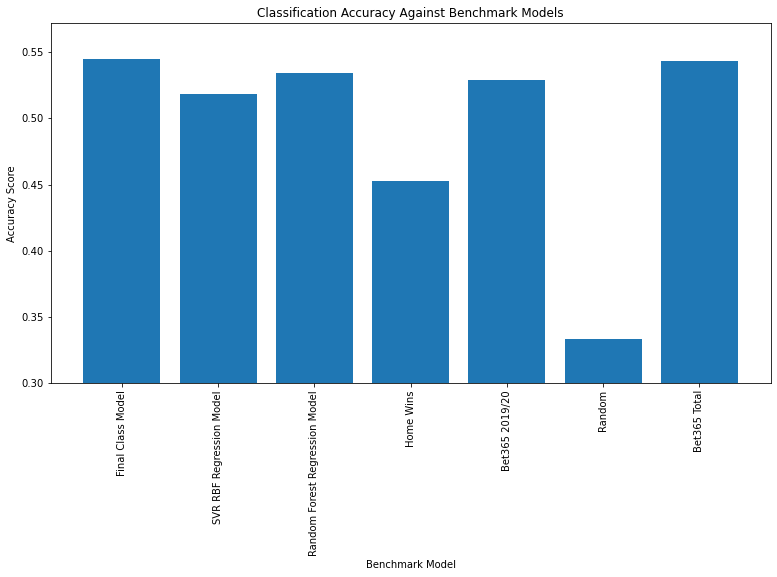

In [203]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([1,1,1,1])
models = ['Final Class Model', 'SVR RBF Regression Model','Random Forest Regression Model','Home Wins','Bet365 2019/20','Random','Bet365 Total']
num_res = [0.5447,0.51842,0.5342,0.453,0.52894,0.333,0.543257]
plt.title('Classification Accuracy Against Benchmark Models')
plt.xlabel('Benchmark Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=90)
ax.bar(models,num_res)
ax.set_ylim(ymin=0.30)
plt.show()

In [220]:
tree_pred = RandomForest_real_data['Predicted Result']
actual_result = RandomForest_real_data['Actual Result']
RandomForest_real_data


,Predicted Result,Actual Result
0,H,H
1,A,A
2,H,D
3,A,H
4,A,D
...,...,...
375,A,A
376,H,H
377,A,A
378,H,H


In [225]:
predictions = pd.DataFrame(RandomForest_real_data)
predictions

predictions['Home Team'] = home_team_name
predictions['Away Team'] = away_team_name
predictions['Home Team Points'] = tree_pred
predictions['Away Team Points'] = tree_pred

real_results = pd.DataFrame(actual_result)
real_results['Home Team'] = home_team_name
real_results['Away Team'] = away_team_name
real_results['Predicted Result'] = tree_pred
real_results['Home Team Points'] = actual_result
real_results['Away Team Points'] = actual_result

real_results.columns = ['Result','Home Team','Away Team','Predicted Result','Home Team Points','Away Team Points']
real_results
predictions
predictions

,Predicted Result,Actual Result,Home Team,Away Team,Home Team Points,Away Team Points
0,H,H,Liverpool,Norwich,H,H
1,A,A,West Ham,Man City,A,A
2,H,D,Bournemouth,Sheffield United,H,H
3,A,H,Burnley,Southampton,A,A
4,A,D,Crystal Palace,Everton,A,A
...,...,...,...,...,...,...
375,A,A,Leicester,Man United,A,A
376,H,H,Man City,Norwich,H,H
377,A,A,Newcastle,Liverpool,A,A
378,H,H,Southampton,Sheffield United,H,H


In [226]:
def add_points(data):
    

    squad_position = data.iloc[:,4].replace(to_replace='H', value=3, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,4].replace(to_replace='A', value=0, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,4].replace(to_replace='D', value=1, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,5].replace(to_replace='A', value=3, regex=False)
    data['Away Team Points'] = squad_position 
    
    squad_position = data.iloc[:,5].replace(to_replace='H', value=0, regex=False)
    data['Away Team Points'] = squad_position 
    
    squad_position = data.iloc[:,5].replace(to_replace='D', value=1, regex=False)
    data['Away Team Points'] = squad_position 
    
    return data

add_points(predictions)
add_points(real_results)

,Result,Home Team,Away Team,Predicted Result,Home Team Points,Away Team Points
0,H,Liverpool,Norwich,H,3,0
1,A,West Ham,Man City,A,0,3
2,D,Bournemouth,Sheffield United,H,1,1
3,H,Burnley,Southampton,A,3,0
4,D,Crystal Palace,Everton,A,1,1
...,...,...,...,...,...,...
375,A,Leicester,Man United,A,0,3
376,H,Man City,Norwich,H,3,0
377,A,Newcastle,Liverpool,A,0,3
378,H,Southampton,Sheffield United,H,3,0


In [227]:
def get_points(football_results):
    
    # initialise arrays
    home_points = []
    away_points = []
    team_name = []
    cumlative_home_points = []
    cumlative_away_points = []
    
    # converts columns to numeric values 
    football_results["Home Team Points"] = pd.to_numeric(football_results["Home Team Points"])
    football_results["Away Team Points"] = pd.to_numeric(football_results["Away Team Points"])
    
    # get points for all teams at home
    for i, val in (football_results.groupby(football_results['Home Team'])['Home Team Points']).sum().iteritems():
        home_points.append(val)
        home_points = home_points

    # get points for all teams away from home
    for i, val in (football_results.groupby(football_results['Away Team'])['Away Team Points']).sum().iteritems():
        team_name.append(i)
        team_name = team_name
        away_points.append(val)
        away_points = away_points
     
    # add home points and away points together 
    total_points = []
    for i in range(0, len(away_points)):
        total_points.append(home_points[i] + away_points[i])
    
    # convert to a dataframe
    total_points = pd.DataFrame(total_points)
    team_name = pd.DataFrame(team_name)
    # add points and teams together 
    table = pd.concat([team_name.reset_index(drop=True),total_points.reset_index(drop=True)], axis=1)
    table.columns = ['Club', 'Points']
    table = table.sort_values(['Points'],ascending=False)
    
        # keeps a cumlative total of teams home points 
    for i, val in (football_results.groupby(football_results['Home Team'])['Home Team Points']).cumsum().iteritems():
        cumlative_home_points.append(val)
        cumlative_home_points = cumlative_home_points

        # keeps a cumlative total of teams away points 
    for i, val in (football_results.groupby(football_results['Away Team'])['Away Team Points']).cumsum().iteritems():
        cumlative_away_points.append(val)
        cumlative_away_points = cumlative_away_points
     
    football_results['total_home_points'] = cumlative_home_points
    football_results['total_away_points'] = cumlative_away_points
    
    return table

predicted_table = get_points(predictions)
real_table = get_points(real_results)

compare_tables = pd.merge(predicted_table, real_table, left_on='Club', right_on='Club', how='left').drop([], axis=1)

compare_tables.columns = ['Club','Predicted Points','Actual Points']
compare_tables

,Club,Predicted Points,Actual Points
0,Liverpool,111,99
1,Man City,108,81
2,Tottenham,99,59
3,Arsenal,90,56
4,Chelsea,84,66
5,Man United,81,66
6,Leicester,69,62
7,Everton,66,49
8,Crystal Palace,61,43
9,Wolves,57,59
